# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [1]:
# Import Dependencies
import sys
import platform

import pandas as pd
import numpy as np
from pathlib import Path

import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras
# Import Sequential and Dense from Tensorflow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 

import matplotlib.pyplot as plt
%matplotlib inline
gpu = len(tf.config.list_physical_devices('GPU'))>0

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Experimenting dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from kerastuner.tuners import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Report Technologies
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-12.6-arm64-arm-64bit
Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) 
[Clang 13.0.1 ]
Pandas 1.5.1
Scikit-Learn 1.1.3
GPU is available


---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [4]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path('Resources_data/applicants_data.csv')
)

# Review the DataFrame
# confirm 'keys' and review the DataFrame
display(applicant_data_df.columns)
print('\n')
display(applicant_data_df.shape)
print('\n')
display(applicant_data_df.info())
print('\n')
display(applicant_data_df.head(3))

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

(34299, 12)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


None

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [5]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [6]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN', 'NAME'])

# Review the DataFrame
display(applicant_data_df.columns)
print('\n')
display(applicant_data_df.head(3))

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [7]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [8]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [9]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

In [10]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# confirm 'keys' and review the DataFrame
display(encoded_df.columns)
print('\n')
display(encoded_df.head(3))

Index(['APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T12', 'APPLICATION_TYPE_T13',
       'APPLICATION_TYPE_T14', 'APPLICATION_TYPE_T15', 'APPLICATION_TYPE_T17',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T2', 'APPLICATION_TYPE_T25',
       'APPLICATION_TYPE_T29',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=114)

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [11]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat(
    [
        applicant_data_df.drop(columns=categorical_variables), 
        encoded_df
    ], 
        axis=1
)

# confirm 'keys' and review the DataFrame
display(encoded_df.columns)
print('\n')
display(encoded_df.head(3))

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T12', 'APPLICATION_TYPE_T13', 'APPLICATION_TYPE_T14',
       'APPLICATION_TYPE_T15', 'APPLICATION_TYPE_T17', 'APPLICATION_TYPE_T19',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=117)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [12]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df['IS_SUCCESSFUL'] 

# Display a sample of y
display(y[:5])
display(y[-5:])

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, dtype: int64

In [13]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
# X = encoded_df.drop('IS_SUCCESSFUL', axis=1)
# X = encoded_df.drop(columns=['IS_SUCCESSFUL'])
X = encoded_df.drop(columns=('IS_SUCCESSFUL')) 

# Review the features DataFrame
display(X.sample(3))

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
7761,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18751,1,61984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16434,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 6: Split the features and target sets into training and testing datasets.


In [14]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.1,                # 90% train : 10% test split
    random_state = SEED
)

### inspect datasets' lengths, i.e. review the split

In [15]:
# inspect the lengths of the full dataset and of split data
display(len(X))            # 34299
display(len(X_train))      # 27439
display(len(X_test))       # 6860

34299

30869

3430

### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [16]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)      # Fit only on X_train

# Scale the features data
X_train_scaled = X_scaler.transform(X_train) 
X_test_scaled = X_scaler.transform(X_test)

# Features count
display(X_train_scaled.shape)
display(X_test_scaled.shape)

(30869, 116)

(3430, 116)

---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [17]:
# Set callbacks
# keras_callbacks = [
    # tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01)]

keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
    tf.keras.callbacks.ModelCheckpoint(filepath='checkpoint', monitor='val_loss', save_best_only=True, mode='min')
]

In [18]:
# Define the the number of inputs (features) to the model
# number_input_features = X_train_scaled.shape[1]
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [19]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + 1) // 2 

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

58

In [20]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

29

In [21]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [22]:
# Create the Sequential model instance
nn = Sequential()

Metal device set to: Apple M1 Max


2022-11-21 20:04:21.407490: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-21 20:04:21.407601: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu')
      )

In [24]:
# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation='relu'))

In [25]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation='sigmoid'))

## Display the structure of your model using the summary function.

In [26]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [27]:
# Compile the Sequential model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using 50 epochs and the training data
model = nn.fit(X_train_scaled, y_train, epochs=50,                     
               validation_data=(X_test, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks # [tf.keras.callbacks.EarlyStopping(patience=20)]
              )

Epoch 1/50


2022-11-21 20:04:21.603820: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-21 20:04:21.751779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5791 - accuracy: 0.7187

2022-11-21 20:04:24.755940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: checkpoint/assets
483/483 [==============================] - 4s 7ms/step - loss: 0.5791 - accuracy: 0.7187 - val_loss: 34675.9141 - val_accuracy: 0.4609
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5547 - accuracy: 0.7293 - val_loss: 99039.1484 - val_accuracy: 0.5391
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5499 - accuracy: 0.7308 - val_loss: 52025.5000 - val_accuracy: 0.4609
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5484 - accuracy: 0.7319 - val_loss: 80833.8906 - val_accuracy: 0.5391
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5468 - accuracy: 0.7322 - val_loss: 59773.2930 - val_accuracy: 0.5391
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5458 - accuracy: 0.7317 - val_loss: 73914.7500 - val_accuracy: 0.5391
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5447 -

### Compare train (loss) and test (val_loss) metrics and look for signs of overfitting

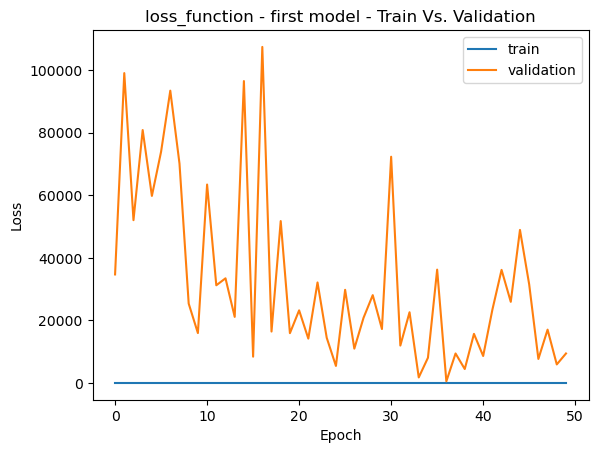

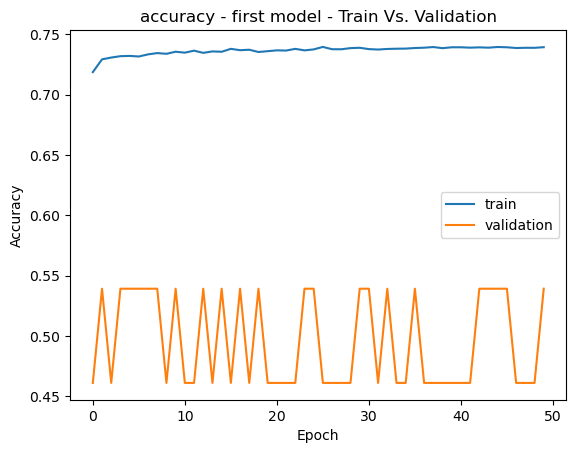

In [28]:
# Plot 'loss', train vs validation for first neural net
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('loss_function - first model - Train Vs. Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                             # 'upper right'
plt.show()

# Plot accuracy', train vs validation for first neural net
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title("accuracy - first model - Train Vs. Validation")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=7)                             # 'center right'

plt.show()

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [29]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2022-11-21 20:06:52.332590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 - 0s - loss: 0.5508 - accuracy: 0.7335 - 418ms/epoch - 4ms/step
Loss: 0.5508484244346619, Accuracy: 0.7335277199745178


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

In [30]:
# Set the model's file path
file_path = Path('./Resources_models/AlphabetSoup.h5')

# Export your model to a HDF5 file
nn.save(file_path)

### Step 5: Save and export the model as JSON to a file, and name the file `AlphabetSoup1.json`. 

In [31]:
# Save model as JSON
nn_json = nn.to_json()

file_path = Path('./Resources_models/AlphabetSoup1.json')
with open(file_path, 'w') as json_file:
    json_file.write(nn_json)
    
# Save the model weights
file_path = "./Resources_models/model.h5"
nn.save_weights("./Resources_models/AlphabetSoup1.h5")

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


# Alternative Model 1
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
> * Add to or reduce the number of epochs in the training regimen.
### review for outlyer data

<AxesSubplot: >

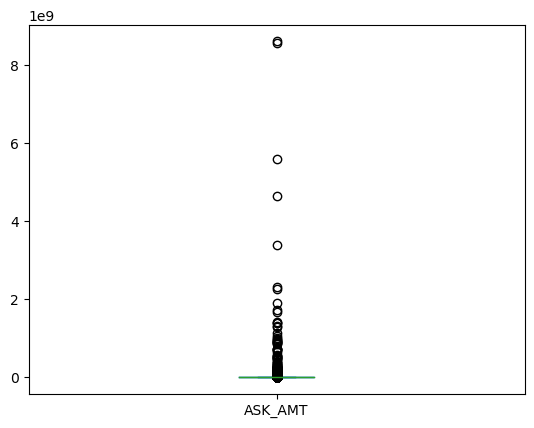

In [32]:
# Analyze one of the non-categorical features - STATUS and ASK_AMT
# feature 'STATUS' is binary.
# Examine 'ASK_AMT' features
applicant_data_df['ASK_AMT'].plot(kind = 'box')

In [33]:
# Drop ASK_AMT feature from X_train and X_test.
X_train_scaled_A1 = X_train_scaled[:, 0:-1]
X_test_scaled_A1 = X_test_scaled[:, 0:-1]

# Checking the number of features
print(X_train_scaled_A1.shape)
print(X_test_scaled_A1.shape)

(30869, 115)
(3430, 115)


### general guideline total number of hidden neurons < 2x input features

In [34]:
# Set callbacks
# keras_callbacks = [
    # tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01)]

keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
    tf.keras.callbacks.ModelCheckpoint(filepath='checkpoint', monitor='val_loss', save_best_only=True, mode='min')
]

In [35]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_A1.shape[1]                 # 115

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = 228                                       # 228

# Define the number of neurons in the output layer
number_output_neurons_A1 = 1                                       # 1

# Create the Sequential model instance
nn_A1 = Sequential()

display(number_input_features, 
        hidden_nodes_layer1_A1,  
        number_output_neurons_A1)

115

228

1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 228)               26448     
                                                                 
 dense_4 (Dense)             (None, 1)                 229       
                                                                 
Total params: 26,677
Trainable params: 26,677
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
 20/483 [>.............................] - ETA: 2s - loss: 0.6562 - accuracy: 0.6500

2022-11-21 20:06:52.986056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


481/483 [============================>.] - ETA: 0s - loss: 0.5748 - accuracy: 0.7213

2022-11-21 20:06:55.653339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: checkpoint/assets
483/483 [==============================] - 3s 6ms/step - loss: 0.5749 - accuracy: 0.7212 - val_loss: 0.5607 - val_accuracy: 0.7262
Epoch 2/50
483/483 [==============================] - 3s 5ms/step - loss: 0.5579 - accuracy: 0.7294 - val_loss: 0.5669 - val_accuracy: 0.7274
Epoch 3/50
483/483 [==============================] - 3s 5ms/step - loss: 0.5553 - accuracy: 0.7289 - val_loss: 0.5653 - val_accuracy: 0.7268
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5520 - accuracy: 0.7309 - val_loss: 0.5527 - val_accuracy: 0.7329
Epoch 5/50
483/483 [==============================] - 3s 5ms/step - loss: 0.5510 - accuracy: 0.7300 - val_loss: 0.5569 - val_accuracy: 0.7303
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5493 - accuracy: 0.7319 - val_loss: 0.5596 - val_accuracy: 0.7306
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5493 - accuracy: 0.7318 - val_

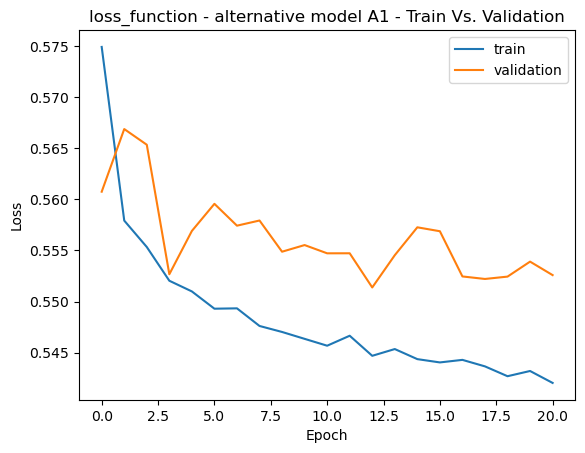

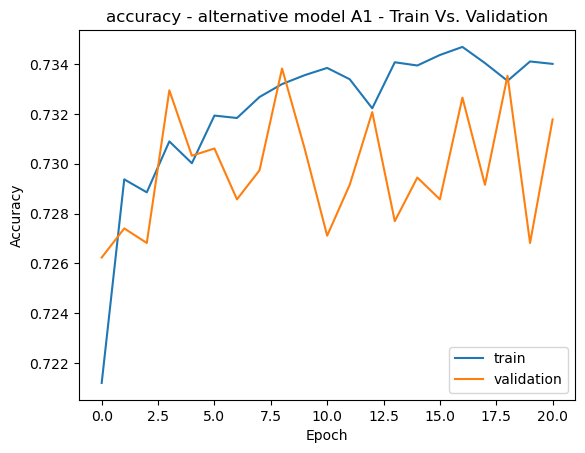

108/108 - 0s - loss: 0.5526 - accuracy: 0.7318 - 349ms/epoch - 3ms/step
Loss: 0.5525846481323242, Accuracy: 0.7317784428596497


In [36]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation='relu')
      )
# Add the output layer to the model specifying the number of output neurons and activation function
nn_A1.add(Dense(units=1, activation='sigmoid'))

# Display the Sequential model summary
nn_A1.summary()

# Compile the Sequential model
nn_A1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using 50 epochs and the training data
model_A1= nn_A1.fit(X_train_scaled_A1, y_train, epochs=50,         
               validation_data=(X_test_scaled_A1, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for model A1 neural net
plt.plot(model_A1.history['loss'])
plt.plot(model_A1.history['val_loss'])
plt.title('loss_function - alternative model A1 - Train Vs. Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                    # 'upper right'
plt.show()

# Plot train vs validation for model A1 neural net
plt.plot(model_A1.history['accuracy'])
plt.plot(model_A1.history['val_accuracy'])
plt.title('accuracy - alternative model A1 - Train Vs. Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                    # 'lower right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A1_loss, model_A1_accuracy = nn_A1.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A1_loss}, Accuracy: {model_A1_accuracy}')

___

# Alternative Model 2
> * Add more neurons (nodes) to a hidden layer.
> * Add to or reduce the number of epochs in the training regimen.

In [37]:
# Define the the number of inputs (features) to the model
# number_input_features = X_train_scaled.shape[1]
number_input_features = len(X_train.iloc[0])                             # 116

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = 152                                             # 152

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 = 76                                              #  76

# Define the number of neurons in the output layer
number_output_neurons_A2 = 1                                             #   1

# Create the Sequential model instance
nn_A2 = Sequential()

display(number_input_features, 
        hidden_nodes_layer1_A2,
        hidden_nodes_layer2_A2,
        number_output_neurons_A2)

116

152

76

1

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 152)               17784     
                                                                 
 dense_6 (Dense)             (None, 76)                11628     
                                                                 
 dense_7 (Dense)             (None, 1)                 77        
                                                                 
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
 18/483 [>.............................] - ETA: 2s - loss: 0.6640 - accuracy: 0.6233

2022-11-21 20:07:51.191440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5712 - accuracy: 0.7217

2022-11-21 20:07:54.099853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 6ms/step - loss: 0.5712 - accuracy: 0.7217 - val_loss: 0.5600 - val_accuracy: 0.7274
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5534 - accuracy: 0.7295 - val_loss: 0.5604 - val_accuracy: 0.7257
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5499 - accuracy: 0.7314 - val_loss: 0.5557 - val_accuracy: 0.7274
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5473 - accuracy: 0.7326 - val_loss: 0.5562 - val_accuracy: 0.7315
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5460 - accuracy: 0.7330 - val_loss: 0.5545 - val_accuracy: 0.7329
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5441 - accuracy: 0.7332 - val_loss: 0.5538 - val_accuracy: 0.7306
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5434 - accuracy: 0.7354 - val_loss: 0.5527 - val_accuracy: 0.7327
Epoch 8/50
483/48

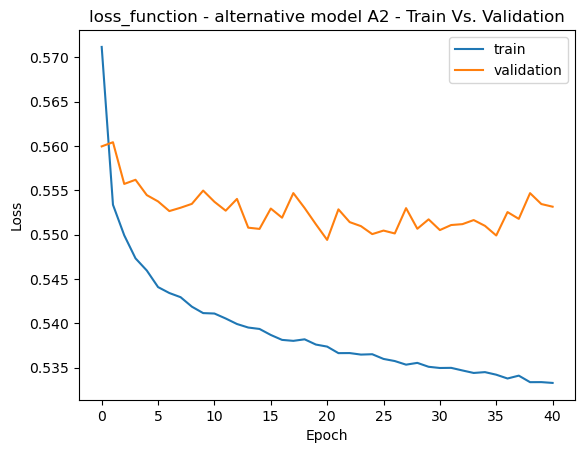

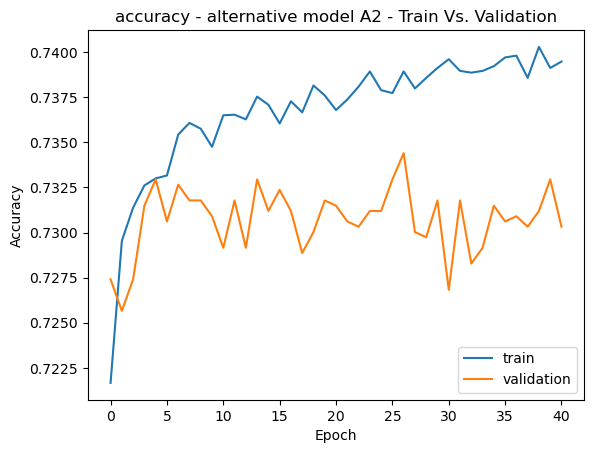

108/108 - 0s - loss: 0.5532 - accuracy: 0.7303 - 378ms/epoch - 3ms/step
Loss: 0.5531550049781799, Accuracy: 0.7303207516670227


In [38]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation='relu')
      )

# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A2.add(Dense(units=hidden_nodes_layer2_A2, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A2.add(Dense(units=1, activation='sigmoid'))

# Display the Sequential model summary
nn_A2.summary()

# Compile the Sequential model
nn_A2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using 50 epochs and the training data
model_A2= nn_A2.fit(X_train_scaled, y_train, epochs=50,         
               validation_data=(X_test_scaled, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for model A2 neural net
plt.plot(model_A2.history['loss'])
plt.plot(model_A2.history['val_loss'])
plt.title("loss_function - alternative model A2 - Train Vs. Validation")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                      # 'upper right'
plt.show()

# Plot train vs validation for model A2 neural net
plt.plot(model_A2.history['accuracy'])
plt.plot(model_A2.history['val_accuracy'])
plt.title("accuracy - alternative model A2 - Train Vs. Validation")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                      # 'lower right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A2_loss, model_A2_accuracy = nn_A2.evaluate(X_test_scaled, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A2_loss}, Accuracy: {model_A2_accuracy}')

___

# Alternative Model 2a
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
> * Add more neurons (nodes) to a hidden layer.
> * Add to or reduce the number of epochs in the training regimen.

In [39]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_A1.shape[1]                     # 115

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2a = 152                                          # 152

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2a = 76                                           #  76

# Define the number of neurons in the output layer                     #   1
number_output_neurons_A2a = 1

# Create the Sequential model instance
nn_A2a = Sequential()

display(number_input_features, 
        hidden_nodes_layer1_A2a, 
        hidden_nodes_layer2_A2a, 
        number_output_neurons_A2a)

115

152

76

1

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 152)               17632     
                                                                 
 dense_9 (Dense)             (None, 76)                11628     
                                                                 
 dense_10 (Dense)            (None, 1)                 77        
                                                                 
Total params: 29,337
Trainable params: 29,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  9/483 [..............................] - ETA: 3s - loss: 0.6641 - accuracy: 0.6510  

2022-11-21 20:09:54.166650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5720 - accuracy: 0.7237

2022-11-21 20:09:57.059065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: checkpoint/assets
483/483 [==============================] - 3s 7ms/step - loss: 0.5720 - accuracy: 0.7237 - val_loss: 0.5598 - val_accuracy: 0.7286
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5533 - accuracy: 0.7300 - val_loss: 0.5600 - val_accuracy: 0.7245
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5493 - accuracy: 0.7316 - val_loss: 0.5577 - val_accuracy: 0.7248
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5470 - accuracy: 0.7316 - val_loss: 0.5528 - val_accuracy: 0.7300
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5455 - accuracy: 0.7333 - val_loss: 0.5545 - val_accuracy: 0.7312
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5440 - accuracy: 0.7346 - val_loss: 0.5535 - val_accuracy: 0.7271
Epoch 7/50
483/483 [==============================] - 3s 7ms/step - loss: 0.5433 - accuracy: 0.7344 - val_

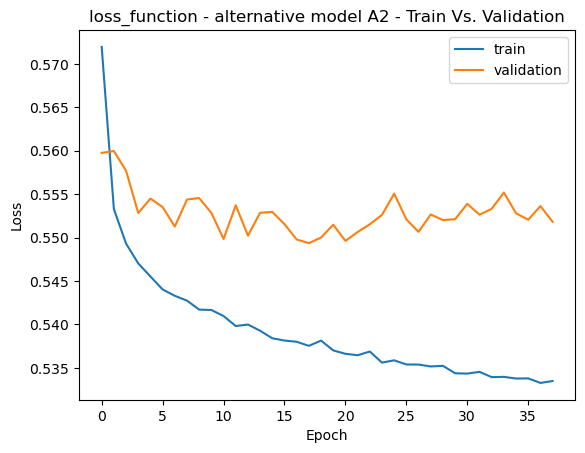

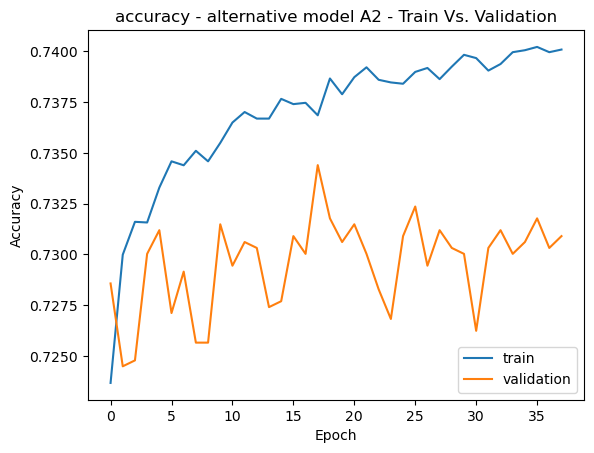

108/108 - 0s - loss: 0.5518 - accuracy: 0.7309 - 381ms/epoch - 4ms/step
Loss: 0.5518169403076172, Accuracy: 0.7309038043022156


In [40]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A2a.add(Dense(units=hidden_nodes_layer1_A2a, input_dim=number_input_features, activation='relu')
      )

# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A2a.add(Dense(units=hidden_nodes_layer2_A2a, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A2a.add(Dense(units=1, activation='sigmoid'))

# Display the Sequential model summary
nn_A2a.summary()

# Compile the Sequential model
nn_A2a.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callbacks
keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
    tf.keras.callbacks.ModelCheckpoint(filepath='checkpoint', monitor='val_loss', save_best_only=True, mode='min')
]

# Fit the model using 50 epochs and the training data
model_A2a= nn_A2a.fit(X_train_scaled_A1, y_train, epochs=50,               #50
               validation_data=(X_test_scaled_A1, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for model A2a neural net
plt.plot(model_A2a.history['loss'])
plt.plot(model_A2a.history['val_loss'])
plt.title("loss_function - alternative model A2 - Train Vs. Validation")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                 # 'upper right'
plt.show()

# Plot train vs validation for model A2a neural net
plt.plot(model_A2a.history['accuracy'])
plt.plot(model_A2a.history['val_accuracy'])
plt.title("accuracy - alternative model A2 - Train Vs. Validation")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                 # 'lower right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A2a_loss, model_A2a_accuracy = nn_A2a.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A2a_loss}, Accuracy: {model_A2a_accuracy}')

___

# Alternative Model 3
> * Decrease complexity.
> * Add to or reduce the number of epochs in the training regimen.

In [41]:
# Define the the number of inputs (features) to the model
# number_input_features = X_train_scaled.shape[1]
number_input_features = len(X_train.iloc[0])             # 116

# Define the number of hidden nodes for the layer
hidden_nodes_layer_A3 = 90                               # 90

# Define the number of neurons in the output layer       # 1
number_output_neurons_A3 = 1

# Create the Sequential model instance
nn_A3 = Sequential()

display(number_input_features, 
        hidden_nodes_layer_A3,  
        number_output_neurons_A3)

116

90

1

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 152)               17784     
                                                                 
 dense_12 (Dense)            (None, 1)                 153       
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
 10/483 [..............................] - ETA: 2s - loss: 0.7074 - accuracy: 0.5797  

2022-11-21 20:11:50.038311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5770 - accuracy: 0.7206

2022-11-21 20:11:52.649354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 6ms/step - loss: 0.5770 - accuracy: 0.7206 - val_loss: 0.5641 - val_accuracy: 0.7312
Epoch 2/50
483/483 [==============================] - 3s 5ms/step - loss: 0.5593 - accuracy: 0.7278 - val_loss: 0.5581 - val_accuracy: 0.7292
Epoch 3/50
483/483 [==============================] - 3s 5ms/step - loss: 0.5544 - accuracy: 0.7301 - val_loss: 0.5606 - val_accuracy: 0.7251
Epoch 4/50
483/483 [==============================] - 3s 5ms/step - loss: 0.5530 - accuracy: 0.7303 - val_loss: 0.5590 - val_accuracy: 0.7300
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5509 - accuracy: 0.7326 - val_loss: 0.5592 - val_accuracy: 0.7306
Epoch 6/50
483/483 [==============================] - 3s 5ms/step - loss: 0.5496 - accuracy: 0.7315 - val_loss: 0.5597 - val_accuracy: 0.7265
Epoch 7/50
483/483 [==============================] - 3s 5ms/step - loss: 0.5493 - accuracy: 0.7317 - val_loss: 0.5550 - val_accuracy: 0.7318
Epoch 8/50
483/48

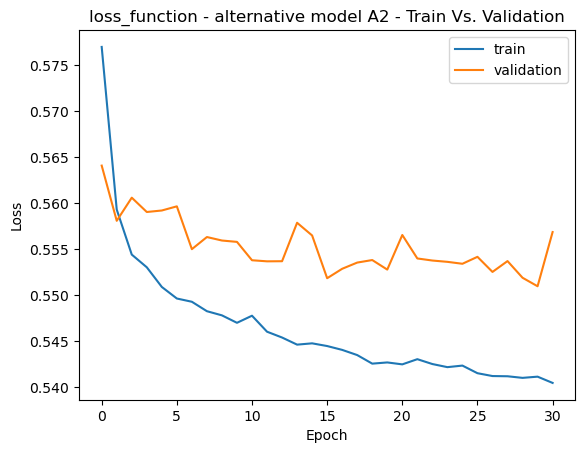

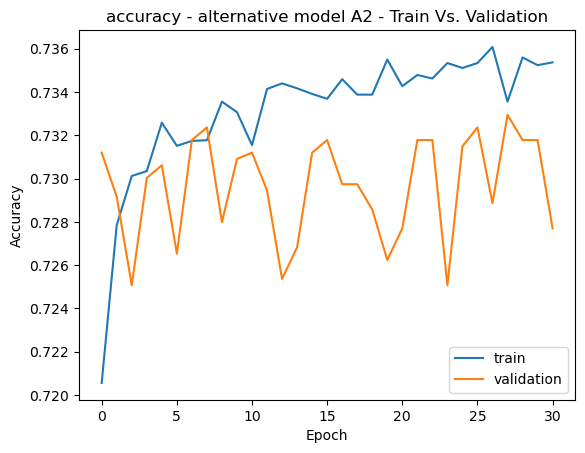

108/108 - 0s - loss: 0.5569 - accuracy: 0.7277 - 360ms/epoch - 3ms/step
Loss: 0.5568599104881287, Accuracy: 0.7276968359947205


In [42]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A3.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation='relu')
      )

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A3.add(Dense(units=1, activation='sigmoid'))

# Display the Sequential model summary
nn_A3.summary()

# Compile the Sequential model
nn_A3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using 50 epochs and the training data
model_A3= nn_A3.fit(X_train_scaled, y_train, epochs=50,             
               validation_data=(X_test_scaled, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for model A3 neural net
plt.plot(model_A3.history['loss'])
plt.plot(model_A3.history['val_loss'])
plt.title("loss_function - alternative model A2 - Train Vs. Validation")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                     # 'upper right'
plt.show()

# Plot train vs validation for model A3 neural net
plt.plot(model_A3.history['accuracy'])
plt.plot(model_A3.history['val_accuracy'])
plt.title("accuracy - alternative model A2 - Train Vs. Validation")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                     # 'lower right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A3_loss, model_A3_accuracy = nn_A3.evaluate(X_test_scaled, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A3_loss}, Accuracy: {model_A3_accuracy}')

___

# Alternative Model 4a
> * Decrease complexity.
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
> * Add to or reduce the number of epochs in the training regimen.

In [43]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_A1.shape[1]           # 115

# Define the number of hidden nodes for the hidden layer 
hidden_nodes_layer_A4 = 82                                   # 82

# Define the number of neurons in the output layer
number_output_neurons_A4 = 1                                 # 1

# Create the Sequential model instance
nn_A4 = Sequential()

display(number_input_features, 
        hidden_nodes_layer_A4,  
        number_output_neurons_A4)

115

82

1

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 228)               26448     
                                                                 
 dense_14 (Dense)            (None, 1)                 229       
                                                                 
Total params: 26,677
Trainable params: 26,677
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
 20/483 [>.............................] - ETA: 2s - loss: 0.6481 - accuracy: 0.6859

2022-11-21 20:13:13.427568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5777 - accuracy: 0.7216

2022-11-21 20:13:16.060539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 6ms/step - loss: 0.5777 - accuracy: 0.7216 - val_loss: 0.5611 - val_accuracy: 0.7210
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5578 - accuracy: 0.7286 - val_loss: 0.5670 - val_accuracy: 0.7271
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5547 - accuracy: 0.7281 - val_loss: 0.5580 - val_accuracy: 0.7309
Epoch 4/50
483/483 [==============================] - 3s 5ms/step - loss: 0.5536 - accuracy: 0.7299 - val_loss: 0.5631 - val_accuracy: 0.7297
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5506 - accuracy: 0.7305 - val_loss: 0.5574 - val_accuracy: 0.7251
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5499 - accuracy: 0.7297 - val_loss: 0.5597 - val_accuracy: 0.7283
Epoch 7/50
483/483 [==============================] - 3s 5ms/step - loss: 0.5495 - accuracy: 0.7307 - val_loss: 0.5569 - val_accuracy: 0.7254
Epoch 8/50
483/48

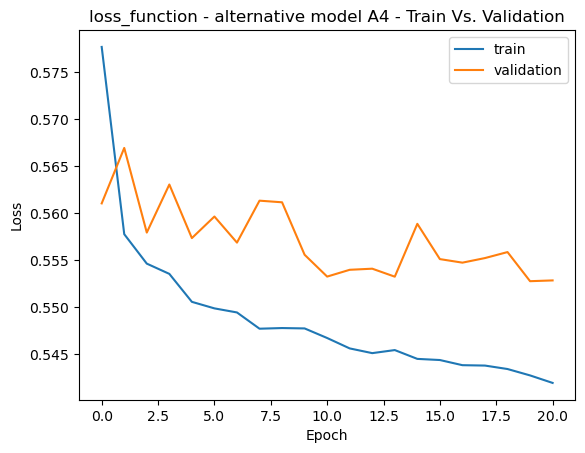

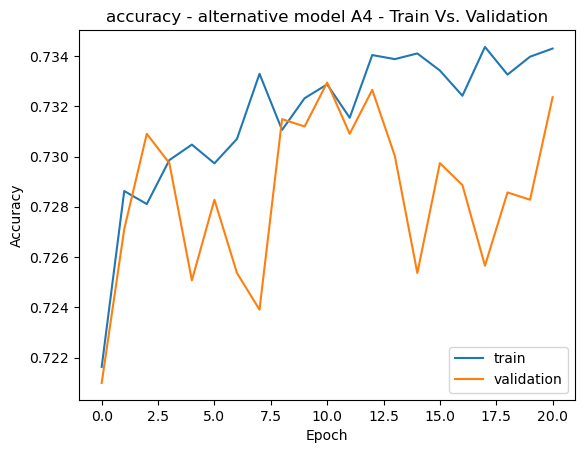

108/108 - 0s - loss: 0.5526 - accuracy: 0.7318 - 325ms/epoch - 3ms/step
Loss: 0.5525846481323242, Accuracy: 0.7317784428596497


In [44]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A4.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation='relu')
      )
# Add the output layer to the model specifying the number of output neurons and activation function
nn_A4.add(Dense(units=1, activation='sigmoid'))

# Display the Sequential model summary
nn_A4.summary()

# Compile the Sequential model
nn_A4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callbacks
keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
]

# Fit the model using 50 epochs and the training data
model_A4= nn_A4.fit(X_train_scaled_A1, y_train, epochs=50,          #50
               validation_data=(X_test_scaled_A1, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for model A4 neural net
plt.plot(model_A4.history['loss'])
plt.plot(model_A4.history['val_loss'])
plt.title("loss_function - alternative model A4 - Train Vs. Validation")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                          # 'upper right'
plt.show()

# Plot train vs validation for model A4 neural net
plt.plot(model_A4.history['accuracy'])
plt.plot(model_A4.history['val_accuracy'])
plt.title("accuracy - alternative model A4 - Train Vs. Validation")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                          # 'lower right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A4_loss, model_A4_accuracy = nn_A1.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A4_loss}, Accuracy: {model_A4_accuracy}')

___

# Alternative Model 5a
> * Add complexity / hidden layer 2.
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
> * Add to or reduce the number of epochs in the training regimen.

In [45]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_A1.shape[1]         # 115

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5a = 82                               # 82

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A5a = 2                                 # 2

# Define the number of neurons in the output layer
number_output_neurons_A5a = 1                               # 1

# Create the Sequential model instance
nn_A5a = Sequential()

display(number_input_features, 
        hidden_nodes_layer1_A5a,
        hidden_nodes_layer2_A5a,
        number_output_neurons_A5a)

115

82

2

1

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 82)                9512      
                                                                 
 dense_16 (Dense)            (None, 2)                 166       
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9,681
Trainable params: 9,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  8/483 [..............................] - ETA: 3s - loss: 0.7372 - accuracy: 0.4961  

2022-11-21 20:14:10.342208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5832 - accuracy: 0.7071

2022-11-21 20:14:13.319636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 6ms/step - loss: 0.5832 - accuracy: 0.7071 - val_loss: 0.5688 - val_accuracy: 0.7178
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5569 - accuracy: 0.7216 - val_loss: 0.5646 - val_accuracy: 0.7213
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5542 - accuracy: 0.7247 - val_loss: 0.5635 - val_accuracy: 0.7210
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5532 - accuracy: 0.7237 - val_loss: 0.5621 - val_accuracy: 0.7184
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5516 - accuracy: 0.7243 - val_loss: 0.5601 - val_accuracy: 0.7207
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5503 - accuracy: 0.7248 - val_loss: 0.5610 - val_accuracy: 0.7227
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5493 - accuracy: 0.7255 - val_loss: 0.5587 - val_accuracy: 0.7201
Epoch 8/50
483/48

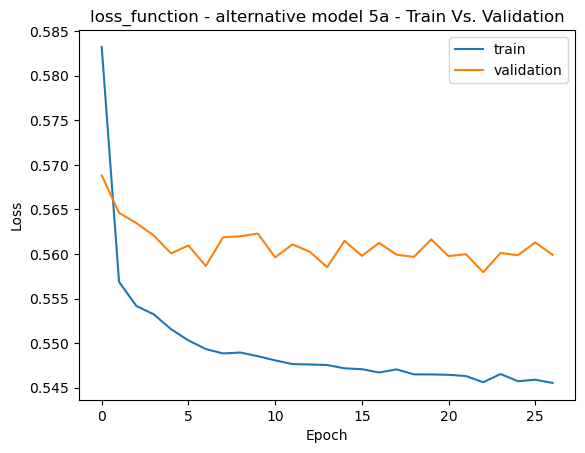

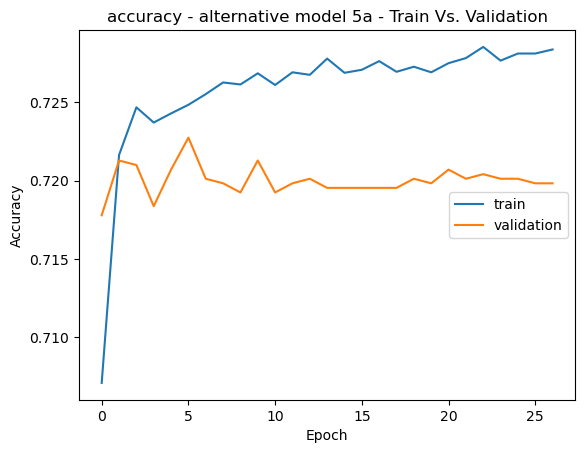

108/108 - 0s - loss: 0.5599 - accuracy: 0.7198 - 392ms/epoch - 4ms/step
Loss: 0.559898316860199, Accuracy: 0.7198250889778137


In [46]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A5a.add(Dense(units=hidden_nodes_layer1_A5a, input_dim=number_input_features, activation='relu')
      )
# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A5a.add(Dense(units=hidden_nodes_layer2_A5a, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A5a.add(Dense(units=number_output_neurons_A5a, activation='sigmoid'))

# Display the Sequential model summary
nn_A5a.summary()

# Compile the Sequential model
nn_A5a.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callbacks
keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
]

# Fit the model using 50 epochs and the training data
model_A5a= nn_A5a.fit(X_train_scaled_A1, y_train, epochs=50,          
               validation_data=(X_test_scaled_A1, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for first neural net
plt.plot(model_A5a.history['loss'])
plt.plot(model_A5a.history['val_loss'])
plt.title("loss_function - alternative model 5a - Train Vs. Validation")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                         # 'upper right'
plt.show()

# Plot train vs validation for first neural net
plt.plot(model_A5a.history['accuracy'])
plt.plot(model_A5a.history['val_accuracy'])
plt.title("accuracy - alternative model 5a - Train Vs. Validation")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                         # 'lower right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5a_loss, model_A5a_accuracy = nn_A5a.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5a_loss}, Accuracy: {model_A5a_accuracy}')

___

In [47]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_A1.shape[1]         # 115

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5b = 82                                # 82

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A5b = 6                                 # 6

# Define the number of neurons in the output layer
number_output_neurons_A5b = 1                               # 1

# Create the Sequential model instance
nn_A5b = Sequential()

display(number_input_features, 
        hidden_nodes_layer1_A5b,
        hidden_nodes_layer2_A5b,
        number_output_neurons_A5b)

115

82

6

1

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 82)                9512      
                                                                 
 dense_19 (Dense)            (None, 6)                 498       
                                                                 
 dense_20 (Dense)            (None, 1)                 7         
                                                                 
Total params: 10,017
Trainable params: 10,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  7/483 [..............................] - ETA: 4s - loss: 0.6931 - accuracy: 0.4598  

2022-11-21 20:15:29.864728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5842 - accuracy: 0.7142

2022-11-21 20:15:32.846079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 6ms/step - loss: 0.5842 - accuracy: 0.7142 - val_loss: 0.5609 - val_accuracy: 0.7274
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5528 - accuracy: 0.7312 - val_loss: 0.5578 - val_accuracy: 0.7289
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5491 - accuracy: 0.7309 - val_loss: 0.5570 - val_accuracy: 0.7303
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5472 - accuracy: 0.7316 - val_loss: 0.5544 - val_accuracy: 0.7329
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5461 - accuracy: 0.7328 - val_loss: 0.5540 - val_accuracy: 0.7335
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5452 - accuracy: 0.7327 - val_loss: 0.5545 - val_accuracy: 0.7327
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5444 - accuracy: 0.7337 - val_loss: 0.5544 - val_accuracy: 0.7324
Epoch 8/50
483/48

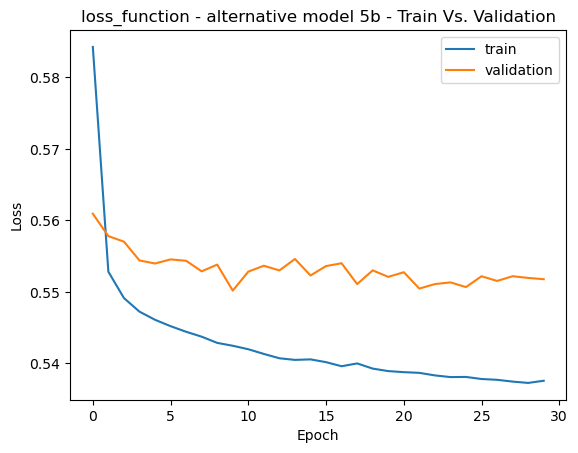

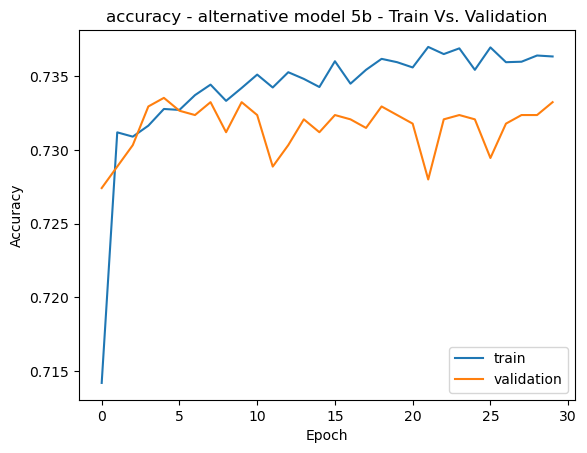

108/108 - 0s - loss: 0.5518 - accuracy: 0.7332 - 402ms/epoch - 4ms/step
Loss: 0.5517755746841431, Accuracy: 0.7332361936569214


In [48]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A5b.add(Dense(units=hidden_nodes_layer1_A5b, input_dim=number_input_features, activation='relu')
      )
# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A5b.add(Dense(units=hidden_nodes_layer2_A5b, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A5b.add(Dense(units=number_output_neurons_A5b, activation='sigmoid'))

# Display the Sequential model summary
nn_A5b.summary()

# Compile the Sequential model
nn_A5b.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callbacks
keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
]

# Fit the model using 50 epochs and the training data
model_A5b= nn_A5b.fit(X_train_scaled_A1, y_train, epochs=50,          
               validation_data=(X_test_scaled_A1, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for first neural net
plt.plot(model_A5b.history['loss'])
plt.plot(model_A5b.history['val_loss'])
plt.title('loss_function - alternative model 5b - Train Vs. Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                    # 'upper right'
plt.show()

# Plot train vs validation for first neural net
plt.plot(model_A5b.history['accuracy'])
plt.plot(model_A5b.history['val_accuracy'])
plt.title('accuracy - alternative model 5b - Train Vs. Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                    # 'lower right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5b_loss, model_A5b_accuracy = nn_A5b.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5b_loss}, Accuracy: {model_A5b_accuracy}')

___

In [49]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_A1.shape[1]         # 115

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5c = 78                                # 78

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A5c = 6                                 # 6

# Define the number of neurons in the output layer
number_output_neurons_A5c = 1                               # 1

# Create the Sequential model instance
nn_A5c = Sequential()

display(number_input_features, 
        hidden_nodes_layer1_A5c,
        hidden_nodes_layer2_A5c,
        number_output_neurons_A5c)

115

78

6

1

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 78)                9048      
                                                                 
 dense_22 (Dense)            (None, 6)                 474       
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 9,529
Trainable params: 9,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  7/483 [..............................] - ETA: 3s - loss: 0.7008 - accuracy: 0.5781  

2022-11-21 20:16:59.630458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5735 - accuracy: 0.7183

2022-11-21 20:17:02.592768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 6ms/step - loss: 0.5735 - accuracy: 0.7183 - val_loss: 0.5574 - val_accuracy: 0.7289
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5520 - accuracy: 0.7300 - val_loss: 0.5552 - val_accuracy: 0.7297
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5486 - accuracy: 0.7305 - val_loss: 0.5545 - val_accuracy: 0.7283
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5473 - accuracy: 0.7318 - val_loss: 0.5537 - val_accuracy: 0.7306
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5459 - accuracy: 0.7326 - val_loss: 0.5540 - val_accuracy: 0.7283
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5452 - accuracy: 0.7316 - val_loss: 0.5528 - val_accuracy: 0.7286
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5447 - accuracy: 0.7333 - val_loss: 0.5524 - val_accuracy: 0.7315
Epoch 8/50
483/48

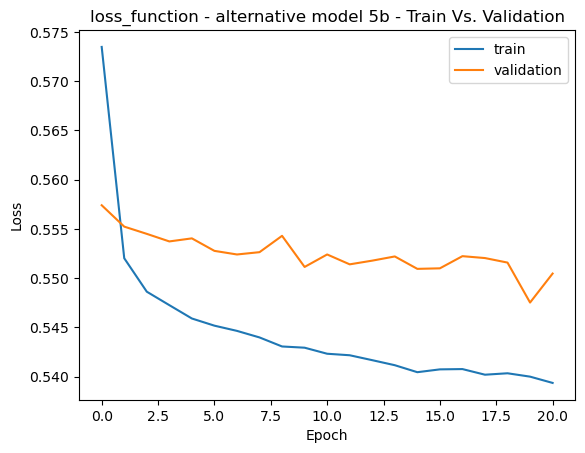

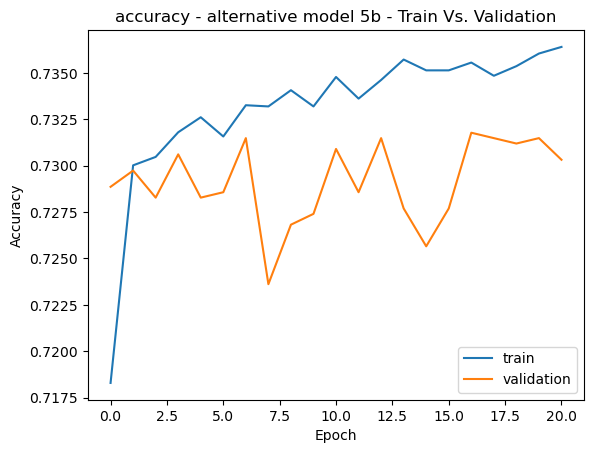

108/108 - 0s - loss: 0.5505 - accuracy: 0.7303 - 411ms/epoch - 4ms/step
Loss: 0.5504677295684814, Accuracy: 0.7303207516670227


In [50]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A5c.add(Dense(units=hidden_nodes_layer1_A5c, input_dim=number_input_features, activation='relu')
      )
# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A5c.add(Dense(units=hidden_nodes_layer2_A5c, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A5c.add(Dense(units=number_output_neurons_A5c, activation='sigmoid'))

# Display the Sequential model summary
nn_A5c.summary()

# Compile the Sequential model
nn_A5c.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callbacks
keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
]

# Fit the model using 50 epochs and the training data
model_A5c= nn_A5c.fit(X_train_scaled_A1, y_train, epochs=50,          
               validation_data=(X_test_scaled_A1, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for first neural net
plt.plot(model_A5c.history['loss'])
plt.plot(model_A5c.history['val_loss'])
plt.title('loss_function - alternative model 5b - Train Vs. Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                        # 'upper right'
plt.show()

# Plot train vs validation for first neural net
plt.plot(model_A5c.history['accuracy'])
plt.plot(model_A5c.history['val_accuracy'])
plt.title('accuracy - alternative model 5b - Train Vs. Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                        # 'bottom right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5c_loss, model_A5c_accuracy = nn_A5c.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5c_loss}, Accuracy: {model_A5c_accuracy}')

___

In [51]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_A1.shape[1]         # 115

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5d = 74                                # 74

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A5d = 6                                 # 6

# Define the number of neurons in the output layer
number_output_neurons_A5d = 1                               # 1

# Create the Sequential model instance
nn_A5d = Sequential()

display(number_input_features, 
        hidden_nodes_layer1_A5d,
        hidden_nodes_layer2_A5d,
        number_output_neurons_A5d)

115

74

6

1

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 74)                8584      
                                                                 
 dense_25 (Dense)            (None, 6)                 450       
                                                                 
 dense_26 (Dense)            (None, 1)                 7         
                                                                 
Total params: 9,041
Trainable params: 9,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  7/483 [..............................] - ETA: 4s - loss: 0.7025 - accuracy: 0.6027  

2022-11-21 20:18:01.485970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5768 - accuracy: 0.7192

2022-11-21 20:18:04.391757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 6ms/step - loss: 0.5768 - accuracy: 0.7192 - val_loss: 0.5596 - val_accuracy: 0.7283
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5539 - accuracy: 0.7293 - val_loss: 0.5595 - val_accuracy: 0.7292
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5495 - accuracy: 0.7318 - val_loss: 0.5545 - val_accuracy: 0.7277
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5480 - accuracy: 0.7317 - val_loss: 0.5570 - val_accuracy: 0.7306
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5464 - accuracy: 0.7329 - val_loss: 0.5548 - val_accuracy: 0.7274
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5454 - accuracy: 0.7330 - val_loss: 0.5517 - val_accuracy: 0.7257
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5445 - accuracy: 0.7332 - val_loss: 0.5521 - val_accuracy: 0.7286
Epoch 8/50
483/48

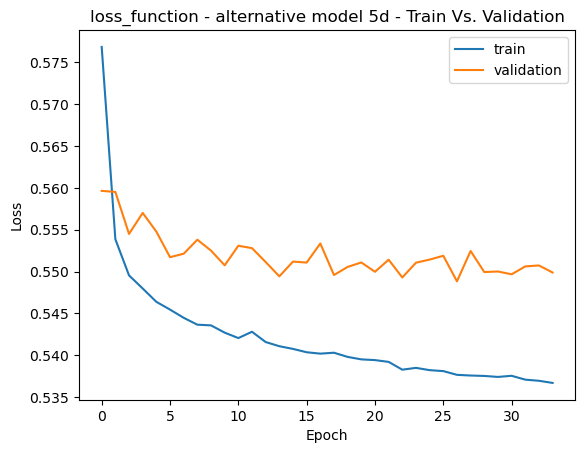

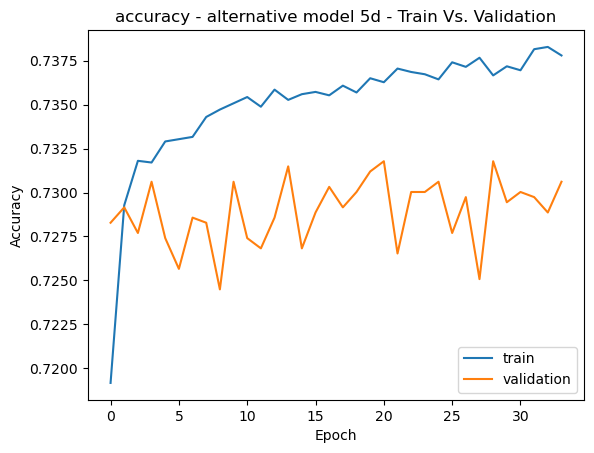

108/108 - 0s - loss: 0.5499 - accuracy: 0.7306 - 401ms/epoch - 4ms/step
Loss: 0.5498802065849304, Accuracy: 0.7306122779846191


In [52]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A5d.add(Dense(units=hidden_nodes_layer1_A5d, input_dim=number_input_features, activation='relu')
      )
# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A5d.add(Dense(units=hidden_nodes_layer2_A5d, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A5d.add(Dense(units=number_output_neurons_A5d, activation='sigmoid'))

# Display the Sequential model summary
nn_A5d.summary()

# Compile the Sequential model
nn_A5d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callbacks
keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
]

# Fit the model using 50 epochs and the training data
model_A5d= nn_A5d.fit(X_train_scaled_A1, y_train, epochs=50,          
               validation_data=(X_test_scaled_A1, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for model 5d neural net
plt.plot(model_A5d.history['loss'])
plt.plot(model_A5d.history['val_loss'])
plt.title('loss_function - alternative model 5d - Train Vs. Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                         # 'upper right'
plt.show()

# Plot train vs validation for model 5d neural net
plt.plot(model_A5d.history['accuracy'])
plt.plot(model_A5d.history['val_accuracy'])
plt.title('accuracy - alternative model 5d - Train Vs. Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                         # 'lower right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5d_loss, model_A5d_accuracy = nn_A5d.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5d_loss}, Accuracy: {model_A5d_accuracy}')

___

In [53]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_A1.shape[1]                   # 115

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5e = 72                                         #  72

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A5e = 8                                          #   8

# Define the number of neurons in the output layer
number_output_neurons_A5e = 1                                        #   1

# Create the Sequential model instance
nn_A5e = Sequential()

display(number_input_features, 
        hidden_nodes_layer1_A5e,
        hidden_nodes_layer2_A5e,
        number_output_neurons_A5e)

115

72

8

1

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 72)                8352      
                                                                 
 dense_28 (Dense)            (None, 8)                 584       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8,945
Trainable params: 8,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  8/483 [..............................] - ETA: 3s - loss: 0.6848 - accuracy: 0.5625  

2022-11-21 20:19:41.073801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5841 - accuracy: 0.7150

2022-11-21 20:19:44.012481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 6ms/step - loss: 0.5841 - accuracy: 0.7150 - val_loss: 0.5603 - val_accuracy: 0.7274
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5544 - accuracy: 0.7285 - val_loss: 0.5580 - val_accuracy: 0.7329
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5495 - accuracy: 0.7304 - val_loss: 0.5543 - val_accuracy: 0.7280
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5472 - accuracy: 0.7316 - val_loss: 0.5520 - val_accuracy: 0.7324
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5457 - accuracy: 0.7330 - val_loss: 0.5542 - val_accuracy: 0.7318
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5444 - accuracy: 0.7328 - val_loss: 0.5527 - val_accuracy: 0.7289
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5439 - accuracy: 0.7330 - val_loss: 0.5539 - val_accuracy: 0.7315
Epoch 8/50
483/48

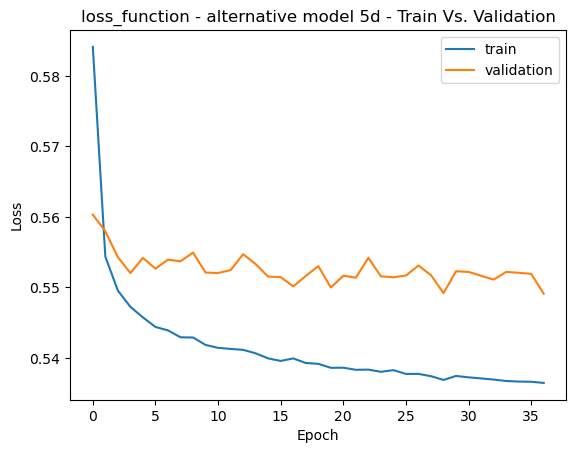

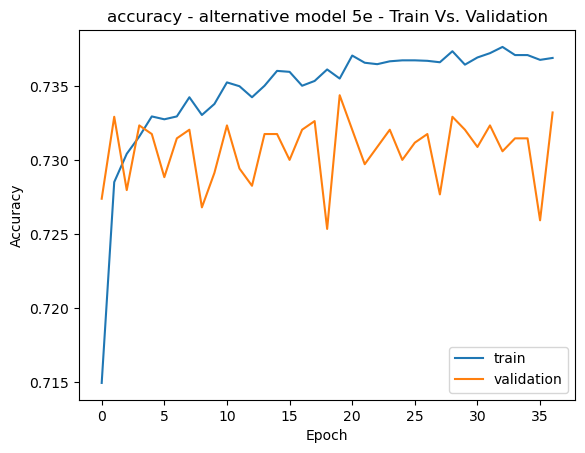

108/108 - 0s - loss: 0.5491 - accuracy: 0.7332 - 411ms/epoch - 4ms/step
Loss: 0.5490933060646057, Accuracy: 0.7332361936569214


In [54]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A5e.add(Dense(units=hidden_nodes_layer1_A5e, input_dim=number_input_features, activation='relu')
      )
# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A5e.add(Dense(units=hidden_nodes_layer2_A5e, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A5e.add(Dense(units=number_output_neurons_A5e, activation='sigmoid'))

# Display the Sequential model summary
nn_A5e.summary()

# Compile the Sequential model
nn_A5e.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callbacks
keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
]

# Fit the model using 50 epochs and the training data
model_A5e= nn_A5e.fit(X_train_scaled_A1, y_train, epochs=50,          
               validation_data=(X_test_scaled_A1, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for model 5e neural net
plt.plot(model_A5e.history['loss'])
plt.plot(model_A5e.history['val_loss'])
plt.title('loss_function - alternative model 5d - Train Vs. Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                 # 'upper right'
plt.show()

# Plot train vs validation for model 5e neural net
plt.plot(model_A5e.history['accuracy'])
plt.plot(model_A5e.history['val_accuracy'])
plt.title('accuracy - alternative model 5e - Train Vs. Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                 # 'bottom right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5e_loss, model_A5e_accuracy = nn_A5e.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5e_loss}, Accuracy: {model_A5e_accuracy}')

___

In [55]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_A1.shape[1]                   # 115

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5f = 68                                         #  68

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A5f = 8                                          #   8

# Define the number of neurons in the output layer
number_output_neurons_A5f = 1                                        #   1

# Create the Sequential model instance
nn_A5f = Sequential()

display(number_input_features, 
        hidden_nodes_layer1_A5f,
        hidden_nodes_layer2_A5f,
        number_output_neurons_A5f)

115

68

8

1

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 68)                7888      
                                                                 
 dense_31 (Dense)            (None, 8)                 552       
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8,449
Trainable params: 8,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  7/483 [..............................] - ETA: 4s - loss: 0.6833 - accuracy: 0.6138  

2022-11-21 20:21:30.236248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5744 - accuracy: 0.7208

2022-11-21 20:21:33.224802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 7ms/step - loss: 0.5744 - accuracy: 0.7208 - val_loss: 0.5579 - val_accuracy: 0.7324
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5518 - accuracy: 0.7302 - val_loss: 0.5575 - val_accuracy: 0.7309
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5488 - accuracy: 0.7319 - val_loss: 0.5533 - val_accuracy: 0.7294
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5475 - accuracy: 0.7325 - val_loss: 0.5518 - val_accuracy: 0.7309
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5463 - accuracy: 0.7325 - val_loss: 0.5528 - val_accuracy: 0.7309
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5453 - accuracy: 0.7322 - val_loss: 0.5521 - val_accuracy: 0.7294
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5444 - accuracy: 0.7330 - val_loss: 0.5520 - val_accuracy: 0.7294
Epoch 8/50
483/48

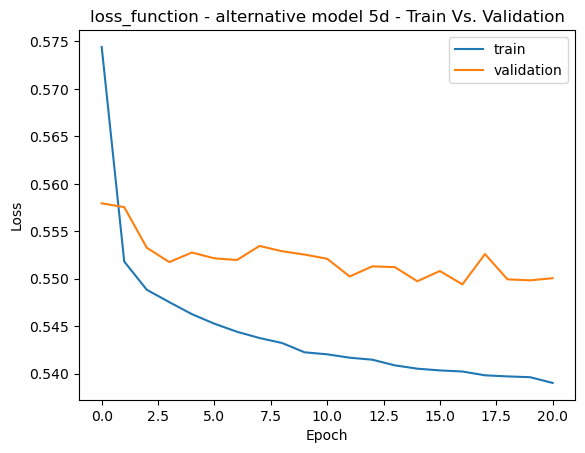

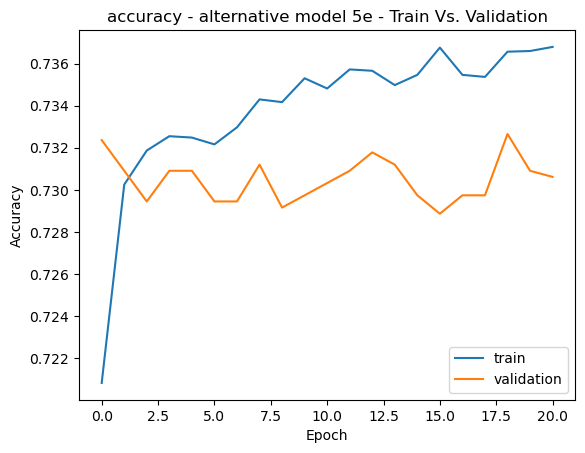

108/108 - 0s - loss: 0.5501 - accuracy: 0.7306 - 413ms/epoch - 4ms/step
Loss: 0.5500530004501343, Accuracy: 0.7306122779846191


In [56]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A5f.add(Dense(units=hidden_nodes_layer1_A5f, input_dim=number_input_features, activation='relu')
      )
# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A5f.add(Dense(units=hidden_nodes_layer2_A5f, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A5f.add(Dense(units=number_output_neurons_A5f, activation='sigmoid'))

# Display the Sequential model summary
nn_A5f.summary()

# Compile the Sequential model
nn_A5f.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callbacks
keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
]

# Fit the model using 50 epochs and the training data
model_A5f= nn_A5f.fit(X_train_scaled_A1, y_train, epochs=50,          
               validation_data=(X_test_scaled_A1, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for model 5e neural net
plt.plot(model_A5f.history['loss'])
plt.plot(model_A5f.history['val_loss'])
plt.title('loss_function - alternative model 5d - Train Vs. Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                     # 'upper right'
plt.show()

# Plot train vs validation for model 5e neural net
plt.plot(model_A5f.history['accuracy'])
plt.plot(model_A5f.history['val_accuracy'])
plt.title('accuracy - alternative model 5e - Train Vs. Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                     # 'lower right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5f_loss, model_A5f_accuracy = nn_A5f.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5f_loss}, Accuracy: {model_A5f_accuracy}')

___

In [57]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_A1.shape[1]                   # 115

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5g = 64                                         #  64

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A5g = 8                                          #   8

# Define the number of neurons in the output layer
number_output_neurons_A5g = 1                                        #   1

# Create the Sequential model instance
nn_A5g = Sequential()

display(number_input_features, 
        hidden_nodes_layer1_A5g,
        hidden_nodes_layer2_A5g,
        number_output_neurons_A5g)

115

64

8

1

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                7424      
                                                                 
 dense_34 (Dense)            (None, 8)                 520       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 7,953
Trainable params: 7,953
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  1/483 [..............................] - ETA: 2:10 - loss: 0.7154 - accuracy: 0.5781

2022-11-21 20:22:31.821291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5797 - accuracy: 0.7172

2022-11-21 20:22:34.759749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 6ms/step - loss: 0.5797 - accuracy: 0.7172 - val_loss: 0.5603 - val_accuracy: 0.7312
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5522 - accuracy: 0.7280 - val_loss: 0.5551 - val_accuracy: 0.7303
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5490 - accuracy: 0.7280 - val_loss: 0.5543 - val_accuracy: 0.7297
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5466 - accuracy: 0.7290 - val_loss: 0.5520 - val_accuracy: 0.7300
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5453 - accuracy: 0.7321 - val_loss: 0.5530 - val_accuracy: 0.7300
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5449 - accuracy: 0.7337 - val_loss: 0.5526 - val_accuracy: 0.7321
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5441 - accuracy: 0.7340 - val_loss: 0.5528 - val_accuracy: 0.7309
Epoch 8/50
483/48

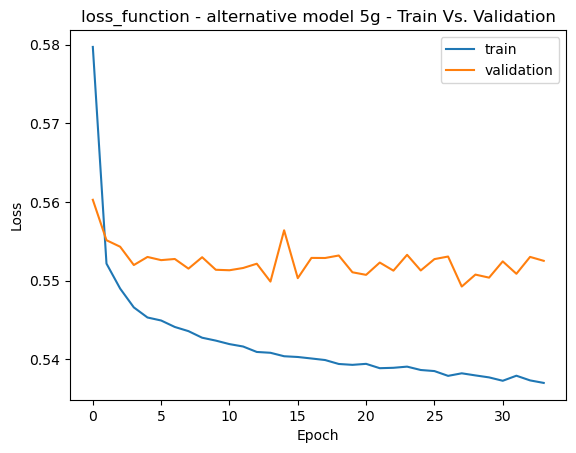

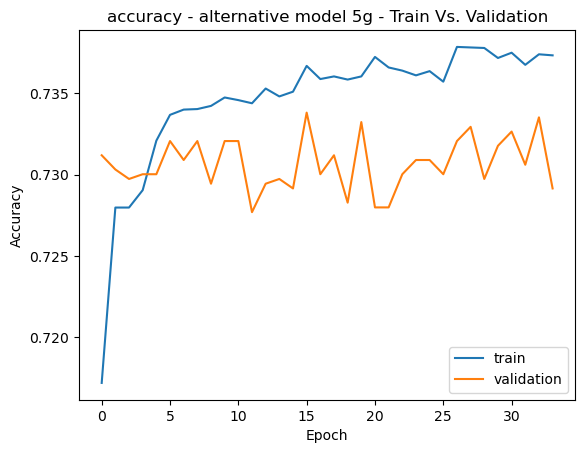

108/108 - 0s - loss: 0.5525 - accuracy: 0.7292 - 466ms/epoch - 4ms/step
Loss: 0.5525285005569458, Accuracy: 0.7291545867919922


In [58]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A5g.add(Dense(units=hidden_nodes_layer1_A5g, input_dim=number_input_features, activation='relu')
      )
# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A5g.add(Dense(units=hidden_nodes_layer2_A5g, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A5g.add(Dense(units=number_output_neurons_A5g, activation='sigmoid'))

# Display the Sequential model summary
nn_A5g.summary()

# Compile the Sequential model
nn_A5g.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set callbacks
keras_callbacks = [
    tf.keras.callbacks.EarlyStopping('val_loss', patience=20, mode='min', min_delta=0.01),
]

# Fit the model using 50 epochs and the training data
model_A5g= nn_A5g.fit(X_train_scaled_A1, y_train, epochs=50,          
               validation_data=(X_test_scaled_A1, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = keras_callbacks #[tf.keras.callbacks.EarlyStopping(patience=20)]
              )

# Plot train vs validation for model 5g neural net
plt.plot(model_A5g.history['loss'])
plt.plot(model_A5g.history['val_loss'])
plt.title('loss_function - alternative model 5g - Train Vs. Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=1)                                          # 'upper right'
plt.show()

# Plot train vs validation for model 5g neural net
plt.plot(model_A5g.history['accuracy'])
plt.plot(model_A5g.history['val_accuracy'])
plt.title('accuracy - alternative model 5g - Train Vs. Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'],loc=4)                                          # 'lower right'
plt.show()

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5g_loss, model_A5g_accuracy = nn_A5g.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5g_loss}, Accuracy: {model_A5g_accuracy}')

___

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [59]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
108/108 - 0s - loss: 0.5508 - accuracy: 0.7335 - 340ms/epoch - 3ms/step
Loss: 0.5508484244346619, Accuracy: 0.7335277199745178


In [60]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A1_loss, model_A1_accuracy = nn_A1.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A1_loss}, Accuracy: {model_A1_accuracy}')

Alternative Model 1 Results
108/108 - 0s - loss: 0.5526 - accuracy: 0.7318 - 328ms/epoch - 3ms/step
Loss: 0.5525846481323242, Accuracy: 0.7317784428596497


In [61]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A2_loss, model_A2_accuracy = nn_A2.evaluate(X_test_scaled, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A2_loss}, Accuracy: {model_A2_accuracy}')

Alternative Model 2 Results
108/108 - 0s - loss: 0.5532 - accuracy: 0.7303 - 341ms/epoch - 3ms/step
Loss: 0.5531550049781799, Accuracy: 0.7303207516670227


In [62]:
print("Alternative Model 3 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A2a_loss, model_A2a_accuracy = nn_A2a.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A2a_loss}, Accuracy: {model_A2a_accuracy}')

Alternative Model 3 Results
108/108 - 0s - loss: 0.5518 - accuracy: 0.7309 - 349ms/epoch - 3ms/step
Loss: 0.5518169403076172, Accuracy: 0.7309038043022156


In [63]:
print("Alternative Model 4 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A3_loss, model_A3_accuracy = nn_A3.evaluate(X_test_scaled, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A3_loss}, Accuracy: {model_A3_accuracy}')

Alternative Model 4 Results
108/108 - 0s - loss: 0.5569 - accuracy: 0.7277 - 323ms/epoch - 3ms/step
Loss: 0.5568599104881287, Accuracy: 0.7276968359947205


In [64]:
print("Alternative Model 5 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A4_loss, model_A4_accuracy = nn_A1.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A4_loss}, Accuracy: {model_A4_accuracy}')

Alternative Model 5 Results
108/108 - 0s - loss: 0.5526 - accuracy: 0.7318 - 323ms/epoch - 3ms/step
Loss: 0.5525846481323242, Accuracy: 0.7317784428596497


In [65]:
print("Alternative Model 6 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5a_loss, model_A5a_accuracy = nn_A5a.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5a_loss}, Accuracy: {model_A5a_accuracy}')

Alternative Model 6 Results
108/108 - 0s - loss: 0.5599 - accuracy: 0.7198 - 348ms/epoch - 3ms/step
Loss: 0.559898316860199, Accuracy: 0.7198250889778137


In [66]:
print("Alternative Model 7 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5b_loss, model_A5b_accuracy = nn_A5b.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5b_loss}, Accuracy: {model_A5b_accuracy}')

Alternative Model 7 Results
108/108 - 0s - loss: 0.5518 - accuracy: 0.7332 - 342ms/epoch - 3ms/step
Loss: 0.5517755746841431, Accuracy: 0.7332361936569214


In [67]:
print("Alternative Model 8 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5c_loss, model_A5c_accuracy = nn_A5c.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5c_loss}, Accuracy: {model_A5c_accuracy}')

Alternative Model 8 Results
108/108 - 0s - loss: 0.5505 - accuracy: 0.7303 - 346ms/epoch - 3ms/step
Loss: 0.5504677295684814, Accuracy: 0.7303207516670227


In [68]:
print("Alternative Model 9 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5d_loss, model_A5d_accuracy = nn_A5d.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5d_loss}, Accuracy: {model_A5d_accuracy}')

Alternative Model 9 Results
108/108 - 0s - loss: 0.5499 - accuracy: 0.7306 - 342ms/epoch - 3ms/step
Loss: 0.5498802065849304, Accuracy: 0.7306122779846191


In [69]:
print("Alternative Model 10 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5e_loss, model_A5e_accuracy = nn_A5e.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5e_loss}, Accuracy: {model_A5e_accuracy}')

Alternative Model 10 Results
108/108 - 0s - loss: 0.5491 - accuracy: 0.7332 - 340ms/epoch - 3ms/step
Loss: 0.5490933060646057, Accuracy: 0.7332361936569214


In [70]:
print("Alternative Model 11 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5f_loss, model_A5f_accuracy = nn_A5f.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5f_loss}, Accuracy: {model_A5f_accuracy}')

Alternative Model 11 Results
108/108 - 0s - loss: 0.5501 - accuracy: 0.7306 - 337ms/epoch - 3ms/step
Loss: 0.5500530004501343, Accuracy: 0.7306122779846191


In [71]:
print("Alternative Model 12 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_A5g_loss, model_A5g_accuracy = nn_A5g.evaluate(X_test_scaled_A1, y_test,verbose=2)
# Display the model loss and accuracy results
print(f'Loss: {model_A5g_loss}, Accuracy: {model_A5g_accuracy}')

Alternative Model 12 Results
108/108 - 0s - loss: 0.5525 - accuracy: 0.7292 - 341ms/epoch - 3ms/step
Loss: 0.5525285005569458, Accuracy: 0.7291545867919922


### Step 3: Save each of your alternative models as an HDF5 file.


In [72]:
# Set the file path for the first alternative model
file_path = # YOUR CODE HERE

# Export your model to a HDF5 file
# YOUR CODE HERE


SyntaxError: invalid syntax (839220193.py, line 2)

In [ ]:
# Set the file path for the second alternative model
file_path = # YOUR CODE HERE

# Export your model to a HDF5 file
# YOUR CODE HERE


# Alternative Model X
